# Training Neural Network

In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

In [3]:
# Create random input and output data
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Randomly initialize weights
w1 = torch.randn(D_in, H)
w2 = torch.randn(H, D_out)

In [4]:
learning_rate = 1e-6

In [5]:
x_list = []
loss_list = []

clamp() : Clamp all elements in input into the range [ min, max ] and return a resulting tensor

In [6]:
for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors
    h = x.mm(w1)
    h_relu = h.clamp(min = 0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    print("[*] t idx : ", t , " loss : ", loss.item())
    
    x_list.append(t)
    loss_list.append(loss)
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

[*] t idx :  0  loss :  39295112.0
[*] t idx :  1  loss :  39891036.0
[*] t idx :  2  loss :  41689088.0
[*] t idx :  3  loss :  37138992.0
[*] t idx :  4  loss :  25960958.0
[*] t idx :  5  loss :  14053206.0
[*] t idx :  6  loss :  6762283.5
[*] t idx :  7  loss :  3388623.75
[*] t idx :  8  loss :  1994837.5
[*] t idx :  9  loss :  1376748.625
[*] t idx :  10  loss :  1055084.125
[*] t idx :  11  loss :  854407.8125
[*] t idx :  12  loss :  711608.9375
[*] t idx :  13  loss :  601751.25
[*] t idx :  14  loss :  514069.65625
[*] t idx :  15  loss :  442542.21875
[*] t idx :  16  loss :  383333.15625
[*] t idx :  17  loss :  333834.90625
[*] t idx :  18  loss :  292252.15625
[*] t idx :  19  loss :  257004.265625
[*] t idx :  20  loss :  226923.625
[*] t idx :  21  loss :  201117.640625
[*] t idx :  22  loss :  178849.171875
[*] t idx :  23  loss :  159543.5
[*] t idx :  24  loss :  142747.765625
[*] t idx :  25  loss :  128071.1875
[*] t idx :  26  loss :  115198.7421875
[*] t idx : 

[*] t idx :  273  loss :  0.1205846518278122
[*] t idx :  274  loss :  0.11523838341236115
[*] t idx :  275  loss :  0.11012037843465805
[*] t idx :  276  loss :  0.1052720695734024
[*] t idx :  277  loss :  0.1006212905049324
[*] t idx :  278  loss :  0.09617354720830917
[*] t idx :  279  loss :  0.09194362163543701
[*] t idx :  280  loss :  0.0879104807972908
[*] t idx :  281  loss :  0.0840294361114502
[*] t idx :  282  loss :  0.08034703880548477
[*] t idx :  283  loss :  0.07680711150169373
[*] t idx :  284  loss :  0.07344891130924225
[*] t idx :  285  loss :  0.07023278623819351
[*] t idx :  286  loss :  0.0671534314751625
[*] t idx :  287  loss :  0.06420472264289856
[*] t idx :  288  loss :  0.061395034193992615
[*] t idx :  289  loss :  0.05870901420712471
[*] t idx :  290  loss :  0.056164033710956573
[*] t idx :  291  loss :  0.053702354431152344
[*] t idx :  292  loss :  0.051336031407117844
[*] t idx :  293  loss :  0.04911519214510918
[*] t idx :  294  loss :  0.04697677

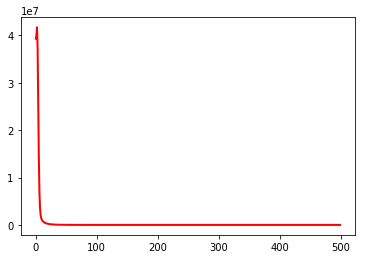

In [7]:
plt.plot(x_list, loss_list, "r-", linewidth=2, label="loss")
plt.show()